In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
plt.style.use('seaborn')

from scipy.interpolate import Rbf

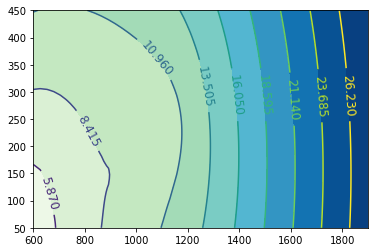

In [5]:
# reference credit: https://blog.csdn.net/gb11235/article/details/121174184
filename = r'./data/contour_demo.txt'
mdf = pd.read_csv(filename, sep="\t")
df1 = mdf['1']
df2 = mdf['2']
df3 = mdf['3']
odf1 = np.linspace(600, 1900, 50) # setting the grid longtitude
odf2 = np.linspace(50, 450, 50) # setting the grid latitude
odf1, odf2 = np.meshgrid(odf1, odf2) # making the grid
func = Rbf(df1, df2, df3, function='linear') # defining interpolation function: plt.cm.hot
odf3_new = func(odf1, odf2) # getting the value of interpolation of the accumulated grid precipitation
plt.contourf(odf1, odf2, odf3_new, levels=np.arange(odf3_new.min(), odf3_new.max(), (odf3_new.max() - odf3_new.min()) / 10), cmap='GnBu', extend='both') # plotting

# Adding contour
line = plt.contour(odf1, odf2, odf3_new, levels=np.arange(odf3_new.min(), odf3_new.max(), (odf3_new.max() - odf3_new.min()) / 10))
plt.clabel(line, inline=True, fontsize=12)
plt.savefig('plt.png')

In [35]:
df = pd.read_excel('./data/final_data.xlsx', sheet_name='unit-pa')

In [36]:
# data preparation
point_list = ['位置1', '位置2', '位置3', '位置4', '位置5', '位置6', '位置7', '位置8', '位置9', '位置10', '位置11', '位置12', '位置13', '位置14', '位置15']
level_list = ['触感（LV4）', '不适（LV6）', '疼痛（LV8）']
avg_array = [[0 for i in range(15)] for j in range(3)]

for i in range(len(level_list)):
    for j in range(len(point_list)):
        avg_array[i][j] = df[df['触觉等级'] == level_list[i]][point_list[j]].mean()

In [214]:
# defining grid position
pos_list = [[900, 800], # 9, 8
            [900, 700], # 9, 7
            [900, 600], # 9, 6
            [800, 400], # 8, 4
            [800, 500], # 8, 5
            [800, 600], # 8, 6
            [700, 700], # 7, 7
            [600, 700], # 6, 7
            [500, 800], # 5, 8
            [500, 600], # 5, 6
            [300, 800], # 3, 8
            [300, 1000], # 3, 10
            [500, 1000], # 5, 10
            [700, 1000], # 7, 10
            [900, 1000]] # 9, 10

# preparing data for new dataframs
lv4data = [[0 for i in range(3)] for j in range(15)]
lv6data = [[0 for i in range(3)] for j in range(15)]
lv8data = [[0 for i in range(3)] for j in range(15)]

for i in range(15):
    lv4data[i][0], lv4data[i][1], lv4data[i][2] = pos_list[i][0], pos_list[i][1], avg_array[0][i]
    lv6data[i][0], lv6data[i][1], lv6data[i][2] = pos_list[i][0], pos_list[i][1], avg_array[1][i]
    lv8data[i][0], lv8data[i][1], lv8data[i][2] = pos_list[i][0], pos_list[i][1], avg_array[2][i]

# creating a set of new dataframes
lv4df = pd.DataFrame(lv4data, columns=['x', 'y', 'value'])
lv6df = pd.DataFrame(lv6data, columns=['x', 'y', 'value'])
lv8df = pd.DataFrame(lv8data, columns=['x', 'y', 'value'])

In [258]:
# modifying the original process into a function
def contour(df, xrange: list, yrange: list, name: str):
    x, y, value = df['x'], df['y'], df['value']
    xrange = np.linspace(xrange[0], xrange[1], xrange[2])
    yrange = np.linspace(yrange[0], yrange[1], yrange[2])
    xrange, yrange = np.meshgrid(xrange, yrange)
    interpolate = Rbf(x, y, value, function='linear')
    interpolate_result = interpolate(xrange, yrange)
    upper, lower = interpolate_result.max(), interpolate_result.min()
    
    figure(figsize=(10, 15), dpi=100)
    plt.contourf(xrange, yrange, interpolate_result, levels=np.arange(lower, upper, (upper - lower) / 10), cmap='RdYlBu', extend='both')
    
    # adding contour
    line = plt.contour(xrange, yrange, interpolate_result, levels=np.arange(lower, upper, (upper - lower) / 10))
    plt.clabel(line, inline=True, fontsize=25)

    # adding points
    for i in range(len(pos_list)):
        plt.scatter(pos_list[i][0], pos_list[i][1], c='black', marker='o')
    
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.title(name, fontsize=30)
    plt.savefig('./imgs/contour/' + name + '.png', format='png', dpi=100)

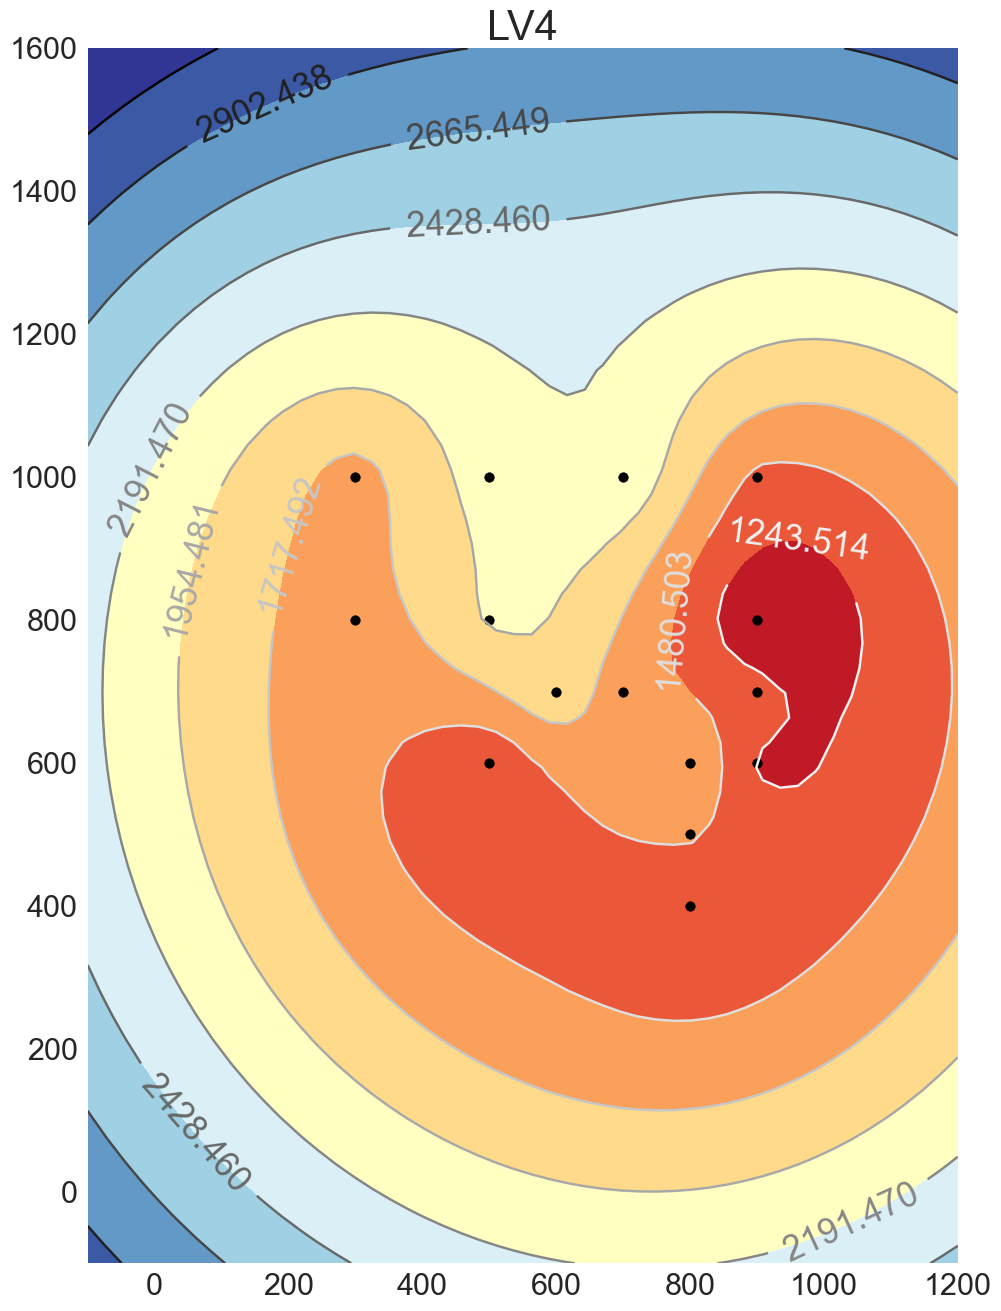

In [259]:
contour(lv4df, (-100, 1200, 50), (-100, 1600, 50), 'LV4')

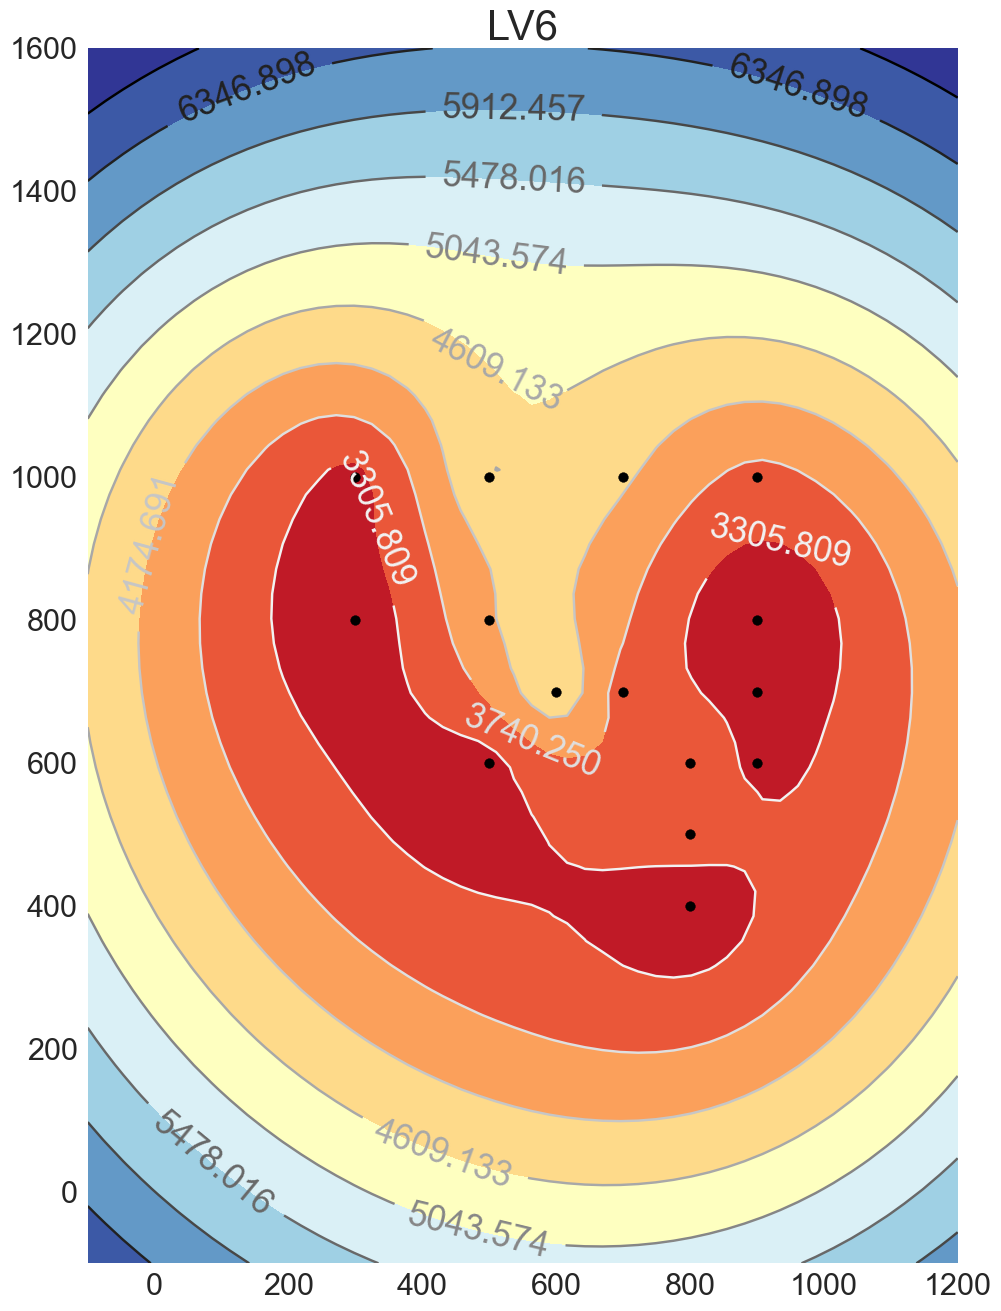

In [260]:
contour(lv6df, (-100, 1200, 50), (-100, 1600, 50), 'LV6')

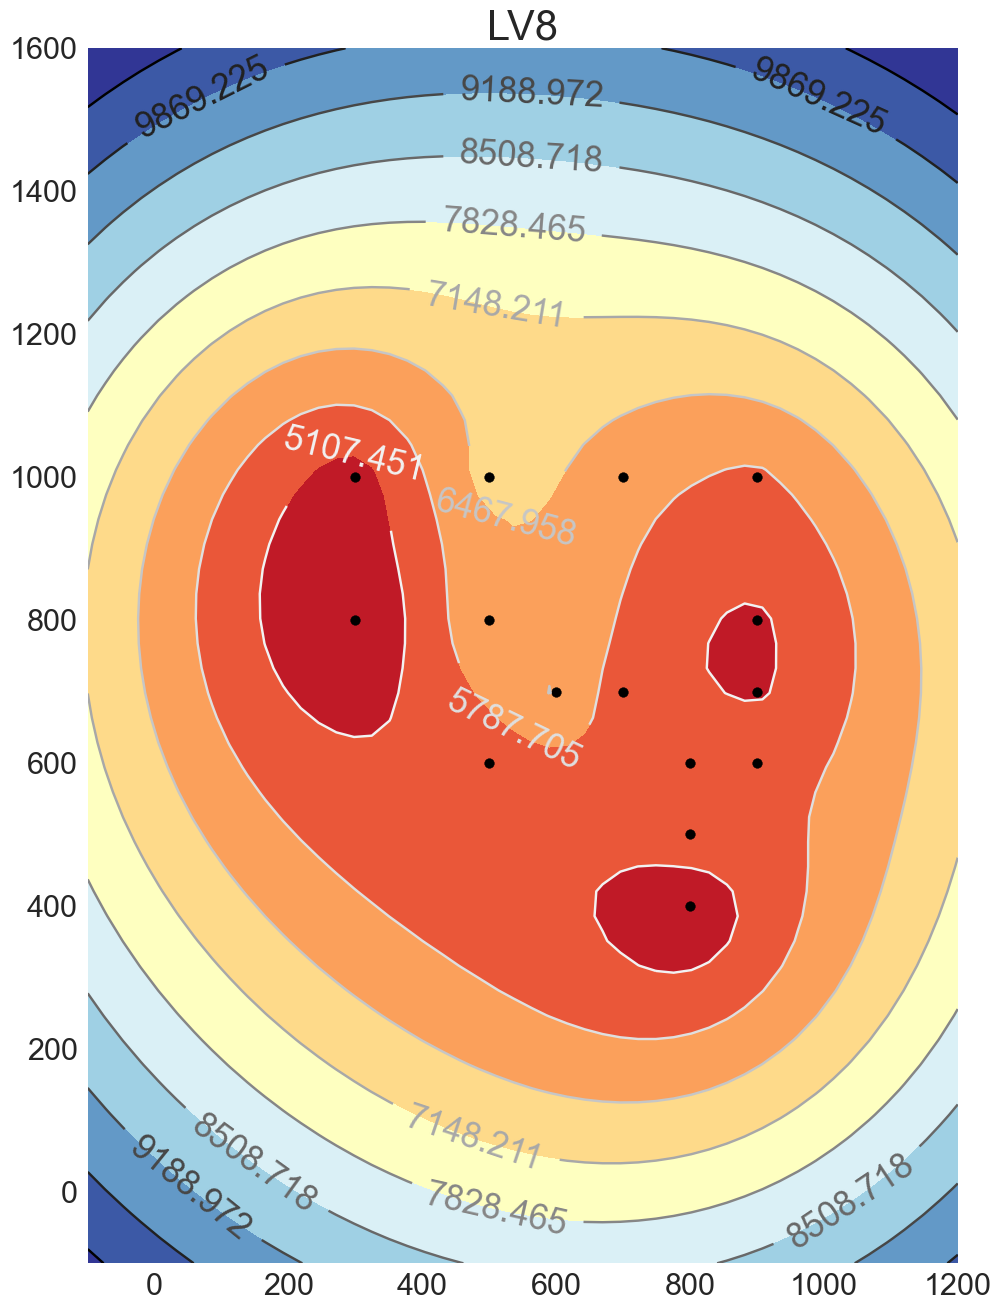

In [261]:
contour(lv8df, (-100, 1200, 50), (-100, 1600, 50), 'LV8')